In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [2]:
import os
for dirname, _, filenames in os.walk('D:/archive/CMaps'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:/archive/CMaps\Damage Propagation Modeling.pdf
D:/archive/CMaps\readme.txt
D:/archive/CMaps\RUL_FD001.txt
D:/archive/CMaps\RUL_FD002.txt
D:/archive/CMaps\RUL_FD003.txt
D:/archive/CMaps\RUL_FD004.txt
D:/archive/CMaps\test_FD001.txt
D:/archive/CMaps\test_FD002.txt
D:/archive/CMaps\test_FD003.txt
D:/archive/CMaps\test_FD004.txt
D:/archive/CMaps\train_FD001.txt
D:/archive/CMaps\train_FD002.txt
D:/archive/CMaps\train_FD003.txt
D:/archive/CMaps\train_FD004.txt
D:/archive/CMaps\x.txt


In [3]:
train_data_no_name = pd.read_csv(r'D:/archive/CMaps/train_FD001.txt', sep = '\s+', header = None)
test_data_no_name = pd.read_csv(r'D:/archive/CMaps/test_FD001.txt', sep = '\s+', header = None)
true_rul_no_name = pd.read_csv(r'D:/archive/CMaps/RUL_FD001.txt', sep = '\s+', header = None)

In [4]:
'''This dataset has 26 columns (as well as the datasets for the other 3 scenarios). 
Because of Python's numbering convention, the columns are numbered from 0 to 25. Description of each column is as follows:

Column 1: Corresponds to engine number (This column is indexed 0 because of Python's numbering convention)
Column 2: Corresponds to cycle number. If engine 1 fails after 192 cycles, the entries of second column for engine 1 will 
go from 1 to 192. Similarly for other engines.
Columns 3,4,5: 3 operational settings
Columns 6-26: 21 sensor measurements.
Hence, we will always refer to the first column as column 1 even though it is indexed as 0 in Python. 
Similarly for other columns.'''

"This dataset has 26 columns (as well as the datasets for the other 3 scenarios). \nBecause of Python's numbering convention, the columns are numbered from 0 to 25. Description of each column is as follows:\n\nColumn 1: Corresponds to engine number (This column is indexed 0 because of Python's numbering convention)\nColumn 2: Corresponds to cycle number. If engine 1 fails after 192 cycles, the entries of second column for engine 1 will \ngo from 1 to 192. Similarly for other engines.\nColumns 3,4,5: 3 operational settings\nColumns 6-26: 21 sensor measurements.\nHence, we will always refer to the first column as column 1 even though it is indexed as 0 in Python. \nSimilarly for other columns."

In [5]:
# Naming the columns
# Let's add columns' names for better identification

columns = {0:'engineNumber', 1:'cycleNumber', 2:'opSetting1', 3:'opSetting2', 4:'opSetting3', 5:'sensor1', 6:'sensor2',
           7:'sensor3', 8:'sensor4', 9:'sensor5', 10:'sensor6', 11:'sensor7', 12:'sensor8', 13:'sensor9', 14:'sensor10',
           15:'sensor11', 16:'sensor12', 17:'sensor13', 18:'sensor14', 19:'sensor15', 20:'sensor16',
           21:'sensor17', 22:'sensor18', 23:'sensor19', 24:'sensor20', 25:'sensor21'}

train_data = train_data_no_name.rename(columns = columns)
test_data = test_data_no_name.rename(columns = columns)
true_rul = true_rul_no_name.rename(columns = {0: 'RUL'})

In [6]:
train_data.describe()

,engineNumber,cycleNumber,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [7]:
true_rul.describe()

,RUL
count,100.00000
mean,75.52000
std,41.76497
min,7.00000
25%,32.75000
50%,86.00000
75%,112.25000
max,145.00000


In [8]:
train_data[train_data['engineNumber'] == 1]

,engineNumber,cycleNumber,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295


In [9]:
# How many engines are there?
num_machines = np.unique(train_data['engineNumber']).shape[0]
num_machines

100

In [10]:
num_cycles_to_failure = train_data.groupby('engineNumber')['cycleNumber'].count()
num_cycles_to_failure[:10]

engineNumber
1     192
2     287
3     179
4     189
5     269
6     188
7     259
8     150
9     201
10    222
Name: cycleNumber, dtype: int64

In [11]:
# Last engine
num_cycles_to_failure[-1:]

engineNumber
100    200
Name: cycleNumber, dtype: int64

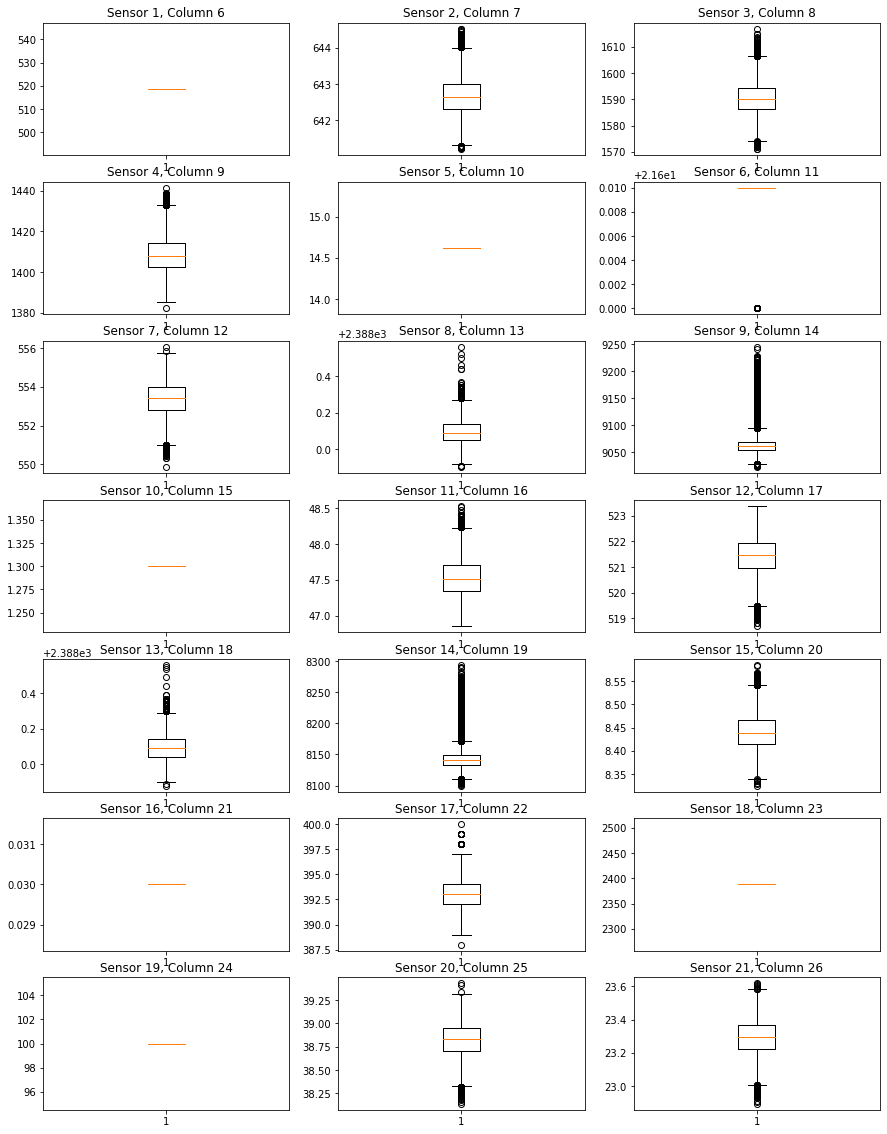

In [12]:
plt.figure(figsize = (15, 20))
for i in range(21):
    temp_data = train_data.iloc[:, i + 5]
    plt.subplot(7, 3, i+1)
    plt.boxplot(temp_data)
    plt.title("Sensor " + str(i+1) + ", Column " + str(i+6))
plt.show()

In [13]:
'''From the above plot we see that columns 6, 10, 11, 15, 21, 23 and 24 contain constant values

These columns corresponds to sensors 1, 5, 6, 10, 16, 18 and 19
Useful sensors are therefore 2, 3, 4, 7, 8, 9, 11, 12 ,13 ,14 ,15 ,17, 20, 21'''

'From the above plot we see that columns 6, 10, 11, 15, 21, 23 and 24 contain constant values\n\nThese columns corresponds to sensors 1, 5, 6, 10, 16, 18 and 19\nUseful sensors are therefore 2, 3, 4, 7, 8, 9, 11, 12 ,13 ,14 ,15 ,17, 20, 21'

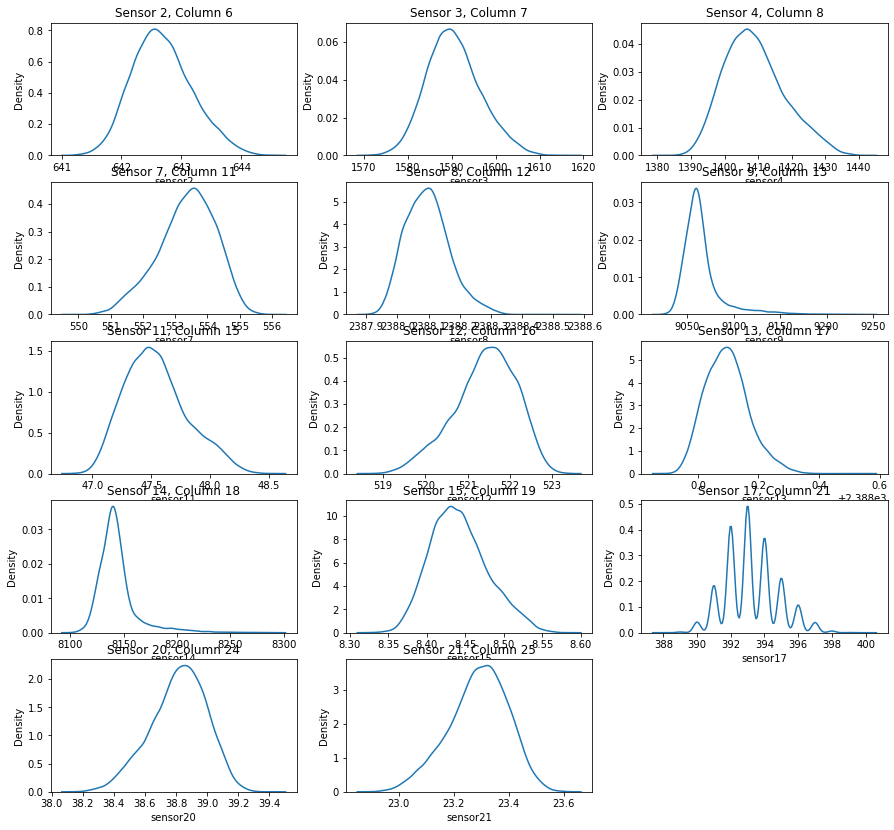

In [14]:
# Probability density distributions for the relevant sensors
plt.figure(figsize = (15, 20))
for i,j in enumerate([6, 7, 8, 11, 12, 13, 15, 16, 17, 18, 19, 21, 24, 25]):
    temp_data = train_data.iloc[:, j]
    plt.subplot(7, 3, i+1)
    sns.kdeplot(temp_data, legend = False)
    plt.title("Sensor " + str(j-4) + ", Column " + str(j))
plt.show()

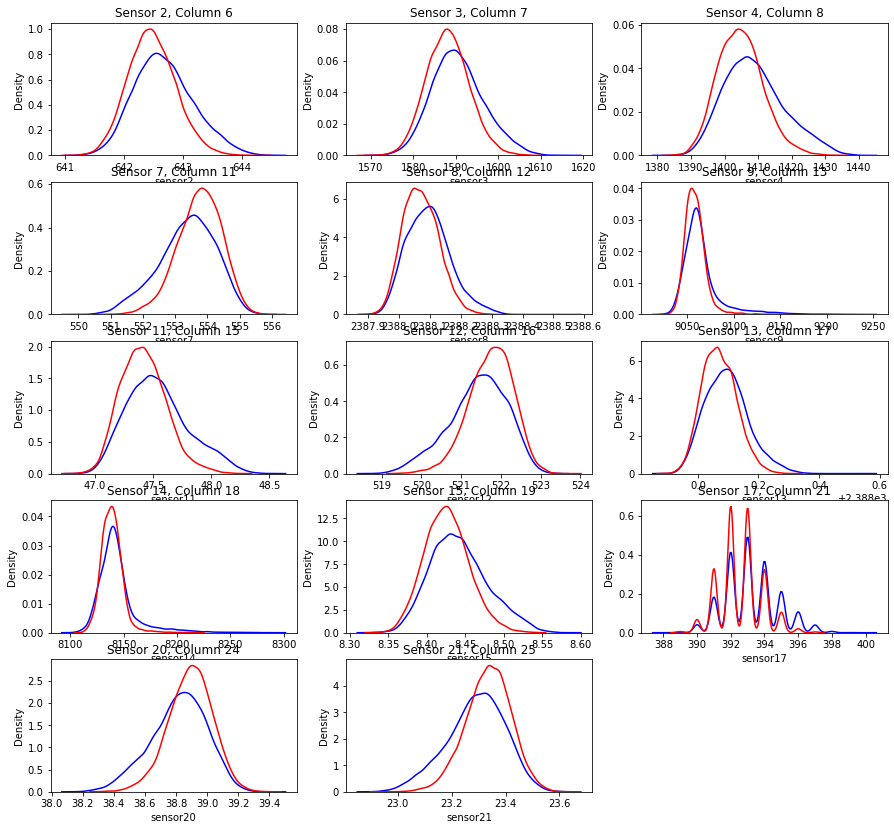

In [15]:
# Probability density distributions on training and testing data
plt.figure(figsize = (15, 20))
for i,j in enumerate([6, 7, 8, 11, 12, 13, 15, 16, 17, 18, 19, 21, 24, 25]):
    temp_train = train_data.iloc[:, j]
    temp_test = test_data.iloc[:, j]
    plt.subplot(7, 3, i+1)
    sns.kdeplot(temp_train, legend = False, label = 'Train', color = 'blue')
    sns.kdeplot(temp_test, legend = False, label  = 'test', color = 'red')
    plt.title("Sensor " + str(j-4) + ", Column " + str(j))
plt.show()

In [16]:
columns_to_keep = ['cycleNumber', 'sensor2', 'sensor3', 'sensor4', 'sensor7', 'sensor8', 'sensor9',
                   'sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15',
                   'sensor17', 'sensor20', 'sensor21']

columns_to_drop = ['opSetting1', 'opSetting2', 'opSetting3',
                   'sensor1','sensor5','sensor6','sensor10','sensor16','sensor18', 'sensor19']

In [17]:
train_data = train_data.drop(columns = columns_to_drop)

In [18]:
train_data.describe()

,engineNumber,cycleNumber,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,642.680934,1590.523119,1408.933782,553.367711,2388.096652,9065.242941,47.541168,521.413470,2388.096152,8143.752722,8.442146,393.210654,38.816271,23.289705
std,29.227633,68.880990,0.500053,6.131150,9.000605,0.885092,0.070985,22.082880,0.267087,0.737553,0.071919,19.076176,0.037505,1.548763,0.180746,0.108251
min,1.000000,1.000000,641.210000,1571.040000,1382.250000,549.850000,2387.900000,9021.730000,46.850000,518.690000,2387.880000,8099.940000,8.324900,388.000000,38.140000,22.894200
25%,26.000000,52.000000,642.325000,1586.260000,1402.360000,552.810000,2388.050000,9053.100000,47.350000,520.960000,2388.040000,8133.245000,8.414900,392.000000,38.700000,23.221800
50%,52.000000,104.000000,642.640000,1590.100000,1408.040000,553.440000,2388.090000,9060.660000,47.510000,521.480000,2388.090000,8140.540000,8.438900,393.000000,38.830000,23.297900
75%,77.000000,156.000000,643.000000,1594.380000,1414.555000,554.010000,2388.140000,9069.420000,47.700000,521.950000,2388.140000,8148.310000,8.465600,394.000000,38.950000,23.366800
max,100.000000,362.000000,644.530000,1616.910000,1441.490000,556.060000,2388.560000,9244.590000,48.530000,523.380000,2388.560000,8293.720000,8.584800,400.000000,39.430000,23.618400


In [19]:
test_data = test_data.drop(columns = columns_to_drop)
test_data.describe()

,engineNumber,cycleNumber,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
count,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000,13096.000000
mean,51.543907,76.836515,642.475088,1588.099204,1404.735362,553.757523,2388.070964,9058.407363,47.416204,521.747724,2388.071025,8138.947817,8.425844,392.571625,38.892502,23.335743
std,28.289423,53.057749,0.400899,5.003274,6.688309,0.681286,0.057442,11.436261,0.195917,0.559627,0.056934,10.188605,0.029009,1.233577,0.141681,0.084120
min,1.000000,1.000000,641.130000,1569.040000,1384.390000,550.880000,2387.890000,9024.530000,46.800000,519.380000,2387.890000,8108.500000,8.332800,389.000000,38.310000,22.935400
25%,28.000000,33.000000,642.197500,1584.600000,1399.950000,553.310000,2388.030000,9051.020000,47.270000,521.380000,2388.030000,8132.310000,8.405600,392.000000,38.800000,23.281600
50%,52.000000,69.000000,642.460000,1587.990000,1404.440000,553.800000,2388.070000,9057.320000,47.410000,521.780000,2388.070000,8138.390000,8.424900,393.000000,38.900000,23.339200
75%,76.000000,113.000000,642.740000,1591.362500,1409.050000,554.240000,2388.110000,9064.110000,47.540000,522.150000,2388.110000,8144.360000,8.444300,393.000000,38.990000,23.393600
max,100.000000,303.000000,644.300000,1607.550000,1433.360000,555.840000,2388.300000,9155.030000,48.260000,523.760000,2388.320000,8220.480000,8.541400,397.000000,39.410000,23.641900


In [20]:
# Linear degradation model
def process_targets_linear(data_length):
    ''' 
    Takes datalength (i.e., total number of cycles for each engine) and decrement 1 per cycle (row)
    '''
    return np.arange(data_length-1, -1, -1)

In [21]:
# Test for a single engine
engine_100_linear_degradation_model = np.arange(200-1, -1, -1)
engine_number = 100

engine_100_cycles_to_failure = train_data.groupby('engineNumber')['cycleNumber'].count().iloc[engine_number - 1]
engine_100_linear_degradation_model = process_targets_linear(engine_100_cycles_to_failure)

In [22]:
# Piecewise linear degradation model if early_rul is provided
# Otherwise the output is the linear degradation model
def process_targets_rul(data_length, early_rul = None):  # Test for a single engine
    if early_rul == None:
        return np.arange(data_length-1, -1, -1)
    else:
        early_rul_duration = data_length - early_rul
        if early_rul_duration <= 0:
            return np.arange(data_length-1, -1, -1)
        else:
            return np.append(early_rul * np.ones(shape = (early_rul_duration)), np.arange(early_rul-1, -1, -1))
    

In [23]:
# Parameter for RUL piecewise linear model
early_rul = 125

# Test for a single engine
engine_100_linear_degradtion_model = process_targets_rul(engine_100_cycles_to_failure)
engine_100_piecewise_degradation_model = process_targets_rul(engine_100_cycles_to_failure, early_rul = early_rul)

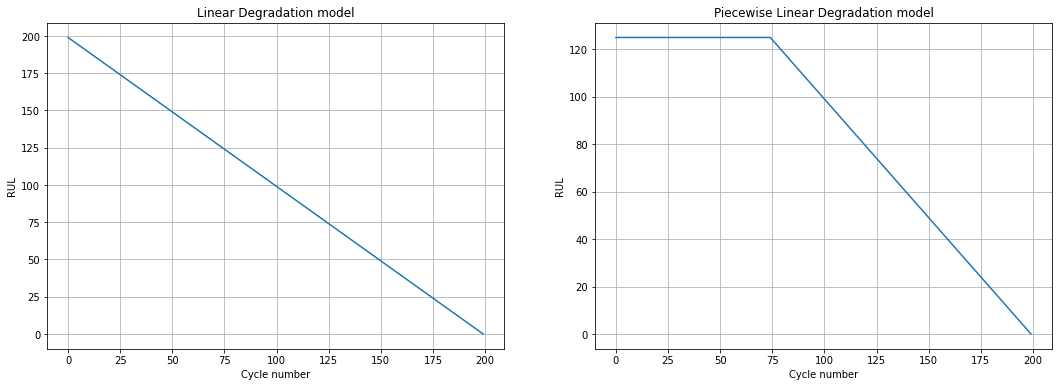

In [24]:
plt.figure(figsize = (18, 6))
plt.subplot(121)
plt.plot(engine_100_linear_degradation_model)
plt.xlabel('Cycle number')
plt.ylabel('RUL')
plt.title('Linear Degradation model')
plt.grid(True)

plt.subplot(122)
plt.plot(engine_100_piecewise_degradation_model)
plt.xlabel('Cycle number')
plt.ylabel('RUL')
plt.title('Piecewise Linear Degradation model')
plt.grid(True)

plt.show()

In [25]:
# How many rows to use for each machine in the testa data
# We take those rows from the tail of data, i.e. points closer to the failure
num_test_rows = 5

# create empty output dataframes
processed_train_data = pd.DataFrame(columns = train_data.columns)
processed_test_data = pd.DataFrame(columns = train_data.columns)
processed_train_targets = pd.DataFrame(columns = ['RUL'])

In [26]:
for i in np.arange(1, num_machines+1):
    i_train_data = train_data[train_data['engineNumber'] == i]
    i_train_targets = process_targets_rul(data_length = i_train_data.shape[0], early_rul = early_rul)
    
    # Convert to dataframe
    i_train_targets = pd.DataFrame(data = i_train_targets, columns = ['RUL'])
    
    # Process test data
    i_test_data = test_data[test_data['engineNumber'] == i].iloc[-num_test_rows:, :]
    
    # Append to output dataframes
    processed_train_targets = processed_train_targets.append(i_train_targets, ignore_index = True)
    processed_test_data = processed_test_data.append(i_test_data, ignore_index = True)

In [27]:
# Training data did not need that transformation
processed_train_data = train_data
print(train_data.shape, processed_train_data.shape, (train_data.shape == processed_train_data.shape))

(20631, 16) (20631, 16) True


In [28]:
processed_train_targets.shape

(20631, 1)

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

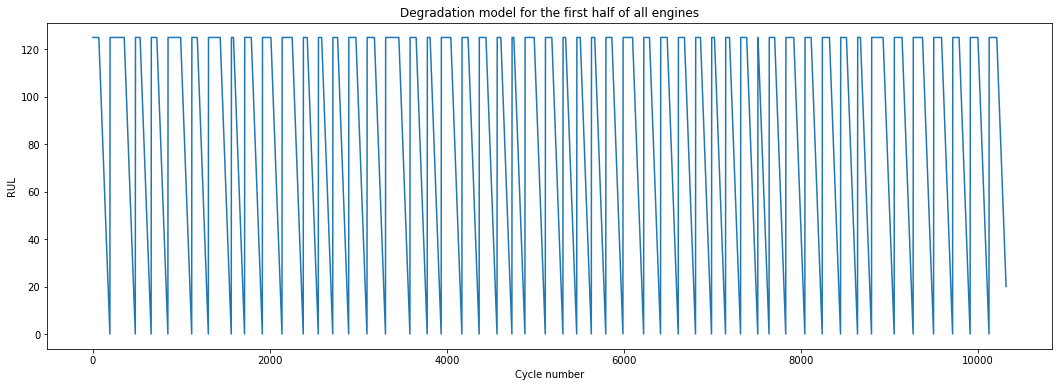

In [29]:
plt.figure(figsize = (18, 6))
plt.plot(processed_train_targets[:10315])
plt.xlabel('Cycle number')
plt.ylabel('RUL')
plt.title('Degradation model for the first half of all engines')
plt.grid

<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

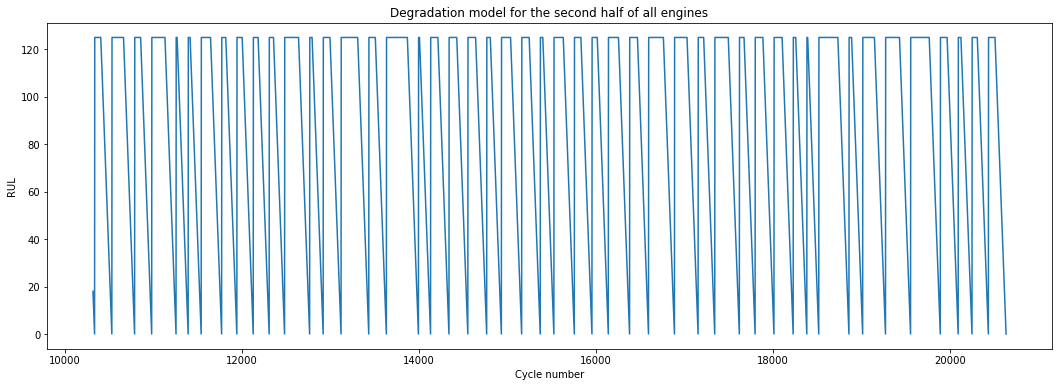

In [30]:
plt.figure(figsize = (18, 6))
plt.plot(processed_train_targets[10316:])
plt.xlabel('Cycle number')
plt.ylabel('RUL')
plt.title('Degradation model for the second half of all engines')
plt.grid

In [31]:
print(test_data.shape, processed_test_data.shape)

(13096, 16) (500, 16)


In [32]:
# Build Random Forest model, train it and predict for the test set

random_forest = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', n_jobs = -1, random_state = 10)
random_forest.fit(processed_train_data.drop(columns = ['engineNumber', 'cycleNumber']), processed_train_targets)

rul_pred = random_forest.predict(processed_test_data.drop(columns = ['engineNumber', 'cycleNumber']))

<ipython-input-32-2e5a15003f13>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(processed_train_data.drop(columns = ['engineNumber', 'cycleNumber']), processed_train_targets)


In [33]:
# Prediction for the TRAIN data, last 5 cycles to failure
rul_pred_train = random_forest.predict(processed_train_data.drop(columns = ['engineNumber', 'cycleNumber']))
rul_pred_train[187:195] # Machine 1

print('Machine 1 Rul: ', rul_pred_train[187 : 192])
print('Machine 2 Rul: ', rul_pred_train[187 + 287 -5 : 192 + 287])
print('Machine 100 Rul: ', rul_pred_train[-5:])

Machine 1 Rul:  [5.77       3.24666667 3.33666667 2.75       1.99      ]
Machine 2 Rul:  [8.64333333 6.99666667 8.98666667 5.79       5.48666667 3.93
 3.71333333 2.60333333 2.27666667 1.22666667]
Machine 100 Rul:  [5.01       4.27       3.28       1.87333333 0.63666667]


In [34]:
# Prediction for the test data
print('Machine 1 prediction: ', rul_pred[:5], '\t RUL at last cycle {:.2f}' .format(rul_pred[5-1]))
print('Machine 2 prediction: ', rul_pred[5:10], '\t RUL at last cycle {:.2f}' .format(rul_pred[10-1]))
print('Machine 3 prediction: ', rul_pred[10:15], '\t RUL at last cycle {:.2f}' .format(rul_pred[15-1]))
print('Machine 4 prediction: ', rul_pred[15:20], '\t RUL at last cycle {:.2f}' .format(rul_pred[20-1]))
print('Machine 5 prediction: ', rul_pred[20:25], '\t RUL at last cycle {:.2f}' .format(rul_pred[25-1]))

print('Machine 100 prediction: ', rul_pred[-5:], '\t RUL at last cycle {:.2f}' .format(rul_pred[500-1]))

Machine 1 prediction:  [120.67666667 110.83       120.89333333 118.62       117.06333333] 	 RUL at last cycle 117.06
Machine 2 prediction:  [119.29       112.6        116.11666667 110.80333333 115.03666667] 	 RUL at last cycle 115.04
Machine 3 prediction:  [67.05666667 62.42666667 70.11       60.29333333 64.58666667] 	 RUL at last cycle 64.59
Machine 4 prediction:  [102.96       108.13       103.65666667  87.97666667  85.23333333] 	 RUL at last cycle 85.23
Machine 5 prediction:  [ 99.07        99.99666667 100.85333333 104.60333333  97.51      ] 	 RUL at last cycle 97.51
Machine 100 prediction:  [25.47666667 26.15666667 27.84       25.35666667 17.72666667] 	 RUL at last cycle 17.73


In [35]:
# Compare with true RUL
print('Machine 1 prediction: {:.2f}' .format(rul_pred[5-1]), '\t Actual RUL: ', true_rul.iloc[0].squeeze())
print('Machine 1 prediction: {:.2f}' .format(rul_pred[10-1]), '\t Actual RUL: ', true_rul.iloc[1].squeeze())
print('Machine 1 prediction: {:.2f}' .format(rul_pred[15-1]), '\t Actual RUL: ', true_rul.iloc[2].squeeze())
print('Machine 1 prediction: {:.2f}' .format(rul_pred[20-1]), '\t Actual RUL: ', true_rul.iloc[3].squeeze())
print('Machine 1 prediction: {:.2f}' .format(rul_pred[25-1]), '\t Actual RUL: ', true_rul.iloc[4].squeeze())

print('Machine 1 prediction: {:.2f}' .format(rul_pred[500-1]), '\t Actual RUL: ', true_rul.iloc[99].squeeze())

Machine 1 prediction: 117.06 	 Actual RUL:  112
Machine 1 prediction: 115.04 	 Actual RUL:  98
Machine 1 prediction: 64.59 	 Actual RUL:  69
Machine 1 prediction: 85.23 	 Actual RUL:  82
Machine 1 prediction: 97.51 	 Actual RUL:  91
Machine 1 prediction: 17.73 	 Actual RUL:  20


In [36]:
rul_pred.shape

(500,)

In [38]:
# First split predictions according to number of cycles (last ones) of each engine
# Take each group of rows (up to 100), and transpose the column vector to a row vector
preds_for_each_engine = np.split(rul_pred, true_rul.shape[0]) # Split by 100 machines (groups of 100 rows)
preds_for_each_engine = np.array(preds_for_each_engine)
print('Shape of preds_for_each_engine ', np.array(preds_for_each_engine).shape)

Shape of preds_for_each_engine  (100, 5)


In [40]:
# Last column contains the last cycle prediction for each engine
last_cycle_rul = preds_for_each_engine[:, preds_for_each_engine.shape[1] -1]
last_cycle_rul.shape

(100,)

In [41]:
true_rul_np = np.array(true_rul)[:, 0]

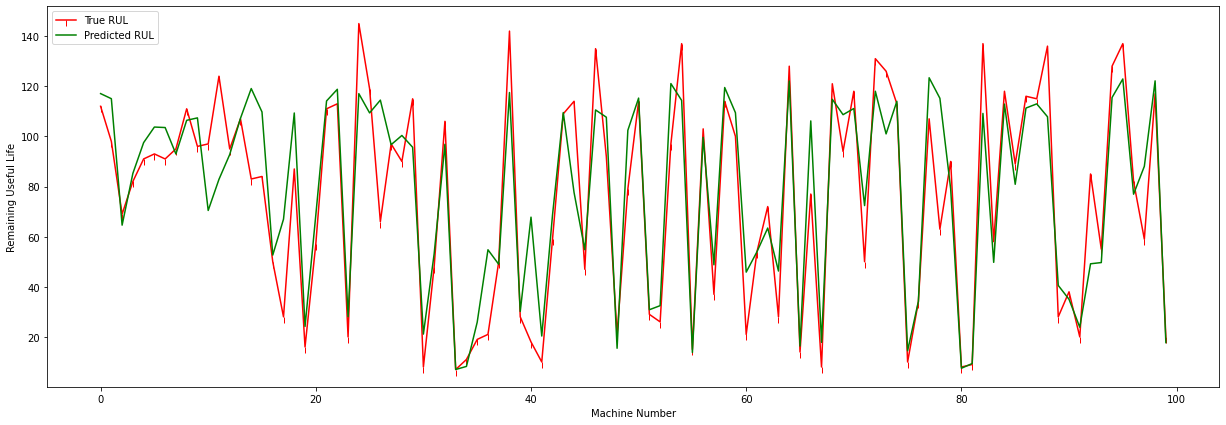

In [44]:
# Plot true and predicted RUL values
plt.figure(figsize = (21, 7))

plt.plot(true_rul_np, label = 'True RUL', color = 'red', marker = 3)
plt.plot(last_cycle_rul, label = 'Predicted RUL', color = 'green')
plt.xlabel('Machine Number')
plt.ylabel('Remaining Useful Life')
plt.legend()
plt.show()

In [46]:
# Feature importance
feature_importance = random_forest.feature_importances_
feature_importance.sum()

0.9999999999999998

In [47]:
# Sort features in descending order
indices = np.argsort(feature_importance)[::-1]

In [49]:
num_features = feature_importance.shape[0]

In [50]:
feature_names = {0:'sensor2', 1:'sensor3', 2:'sensor4', 3:'sensor7', 4:'sensor8',
                 5:'sensor9', 6:'sensor11', 7:'sensor12', 8:'sensor13', 9:'sensor14',
                 10:'sensor15', 11:'sensor17', 12:'sensor20', 13:'sensor21'}

# Reorder dict by descending feature importance
for key in indices:
    feature_names[key] = feature_names.pop(key)

features = list(feature_names.values())

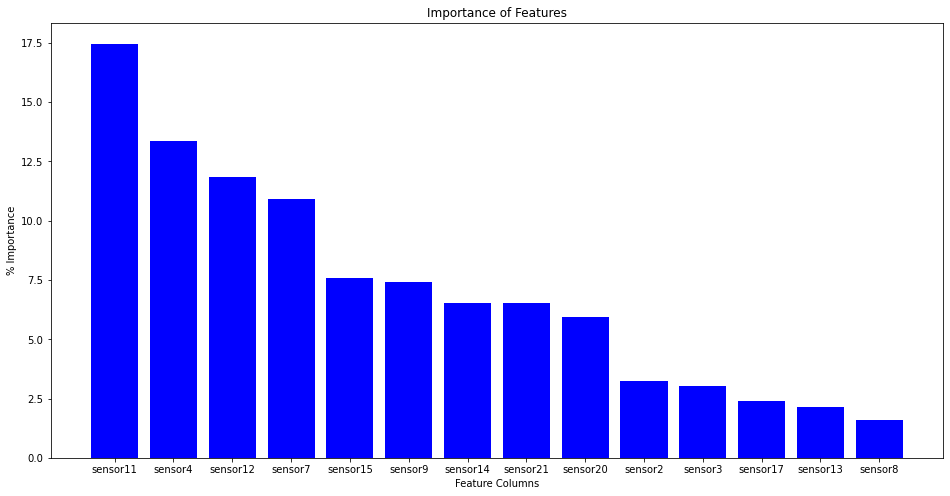

In [53]:
plt.figure(figsize = (16, 8))
plt.title('Importance of Features')

plt.bar(range(num_features), feature_importance[indices] * 100, color = 'blue', align = 'center')
plt.xticks(range(num_features), features)
plt.xlabel('Feature Columns')
plt.ylabel('% Importance')
# plt.xlim(-1, num_features)
plt.show()